## <span style="color:#F39C12">1. Academic Performance by Program
</span>
This analysis shows the **average, minimum, and maximum student scores** grouped by program.  
It helps us identify which programs have the highest overall performance.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",             
    password="",  
    database="university_system_management"
)

,program_name,avg_score,min_score,max_score
0,Software Development,83.699231,50.40,97.67
1,Mechanical Engineering,82.880833,54.76,97.84
2,Graphic Design,78.390909,50.07,94.91
3,Marketing,78.298333,65.14,96.51
4,Music Theory,76.183333,52.52,96.25
5,Data Analytics,75.236429,50.77,99.47
6,Public Health,74.525385,57.88,88.43
7,Nursing,73.066000,50.59,98.58
8,Finance,72.241176,50.69,94.14
9,Civil Engineering,70.613571,50.29,97.53


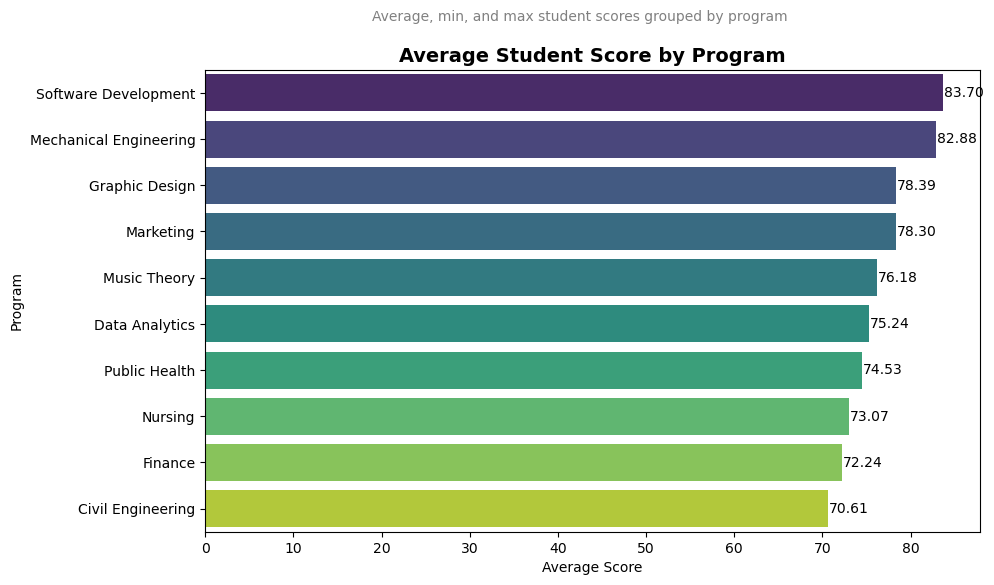

In [3]:
query1 = """
SELECT p.name AS program_name,
       AVG(g.score) AS avg_score,
       MIN(g.score) AS min_score,
       MAX(g.score) AS max_score
FROM Grades g
JOIN Students s ON g.student_id = s.student_id
JOIN Programs p ON s.program_id = p.program_id
GROUP BY p.name
ORDER BY avg_score DESC;
"""
df1 = pd.read_sql_query(query1, conn)
display(df1)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df1,
    x="avg_score",
    y="program_name",
    hue="program_name",
    palette="viridis",
    legend=False
)

for i, v in enumerate(df1["avg_score"]):
    ax.text(v + 0.1, i, f"{v:.2f}", color="black", va="center")

plt.title("Average Student Score by Program", fontsize=14, fontweight="bold")
plt.suptitle("Average, min, and max student scores grouped by program", fontsize=10, color="gray")
plt.xlabel("Average Score")
plt.ylabel("Program")
plt.show()


## <span style="color:#F39C12">2. Payment Distribution by Type
This analysis shows the **proportion of payments** made through each payment type.  
It helps us understand which payment method is most frequently used by students.


💳 Payment Distribution by Type


,payment_type,total_payments,total_amount,avg_payment
0,cash,63,76421.61,1213.041429
1,card,46,60871.98,1323.303913
2,transfer,41,53069.84,1294.386341


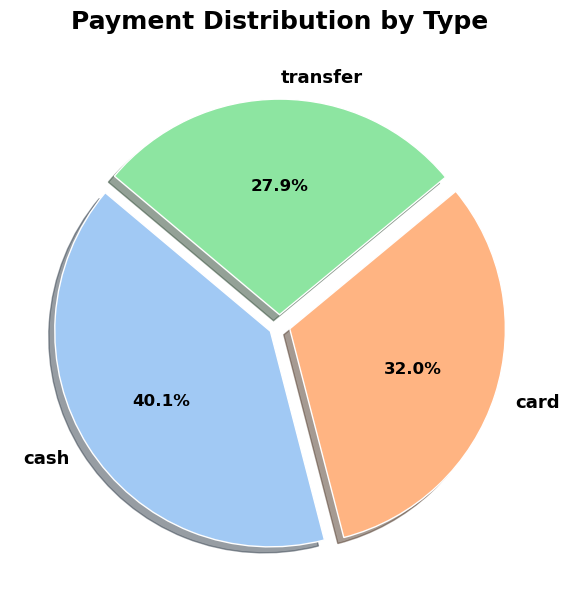

In [4]:
# -----------------------------------------------------------
# 2. Payment Distribution by Type (Enhanced Design)
# -----------------------------------------------------------
query2 = """
SELECT payment_type,
       COUNT(*) AS total_payments,
       SUM(amount) AS total_amount,
       AVG(amount) AS avg_payment
FROM Payments
GROUP BY payment_type
ORDER BY total_amount DESC;
"""
df2 = pd.read_sql_query(query2, conn)

print("💳 Payment Distribution by Type")
display(df2)

# Enhanced Pie Chart
plt.figure(figsize=(7,7))
colors = sns.color_palette("pastel")

# explode: separate slices slightly
explode = [0.05] * len(df2)  

wedges, texts, autotexts = plt.pie(
    df2["total_amount"],
    labels=df2["payment_type"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops=dict(edgecolor="white")
)

# Style labels
for text in texts:
    text.set(size=13, fontweight="bold")
for autotext in autotexts:
    autotext.set(size=12, color="black", fontweight="bold")

plt.title("Payment Distribution by Type", fontsize=18, fontweight="bold", pad=20)
plt.show()


## <span style="color:#F39C12">3. Course Section Occupancy
This analysis shows the **fill rate of each course section** compared to its capacity.  
We focus on the **Top 10 most filled sections** to highlight where demand is highest.

,section_code,total_students,capacity,fill_rate
0,nmVh533,7,27,25.9259
1,gMcC763,8,32,25.0000
2,pVcz214,12,58,20.6897
3,Mcem838,6,29,20.6897
4,JFdw167,5,27,18.5185
5,Hiyp992,8,46,17.3913
6,WXdi328,5,29,17.2414
7,nvta278,7,43,16.2791
8,zHiU912,6,37,16.2162
9,Ajty626,5,33,15.1515


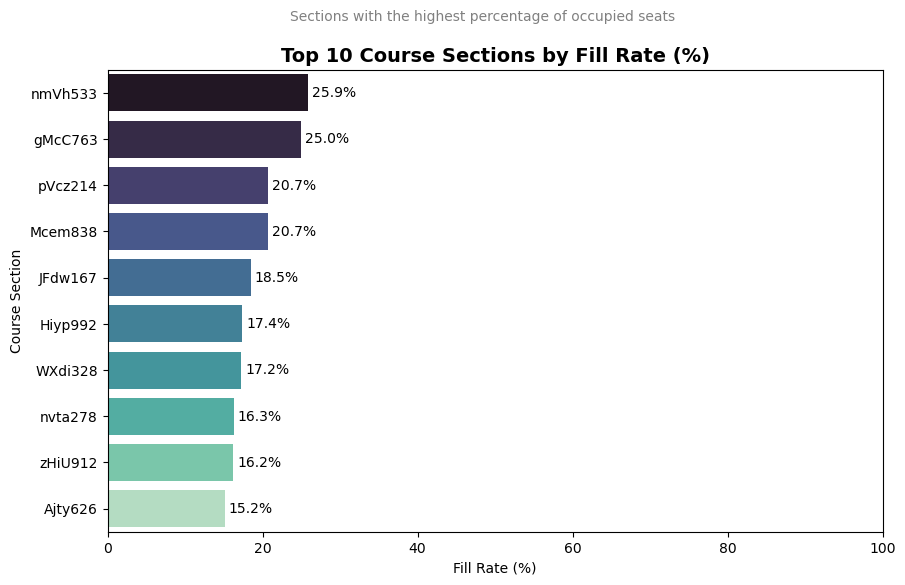

In [5]:
query3 = """
SELECT cs.section_code,
       COUNT(e.student_id) AS total_students,
       cs.capacity,
       (COUNT(e.student_id) / cs.capacity) * 100 AS fill_rate
FROM Course_Sections cs
LEFT JOIN Enrollments e ON cs.section_id = e.section_id
GROUP BY cs.section_code, cs.capacity
ORDER BY fill_rate DESC;
"""
df3 = pd.read_sql(query3, conn)
display(df3)

df3_top = df3.sort_values("fill_rate", ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df3_top,
    x="fill_rate",
    y="section_code",
    hue="section_code",
    palette="mako",
    legend=False
)

for i, v in enumerate(df3_top["fill_rate"]):
    ax.text(v + 0.5, i, f"{v:.1f}%", color="black", va="center")

plt.title("Top 10 Course Sections by Fill Rate (%)", fontsize=14, fontweight="bold")
plt.suptitle("Sections with the highest percentage of occupied seats", fontsize=10, color="gray")
plt.xlabel("Fill Rate (%)")
plt.ylabel("Course Section")
plt.xlim(0, 100)
plt.show()



## <span style="color:#F39C12">4. Student Languages (from JSON)
This analysis extracts the **language field from the JSON column in Students table**.  
It shows the distribution of languages spoken by students.


,language,total_students
0,en,78
1,fr,73
2,es,69


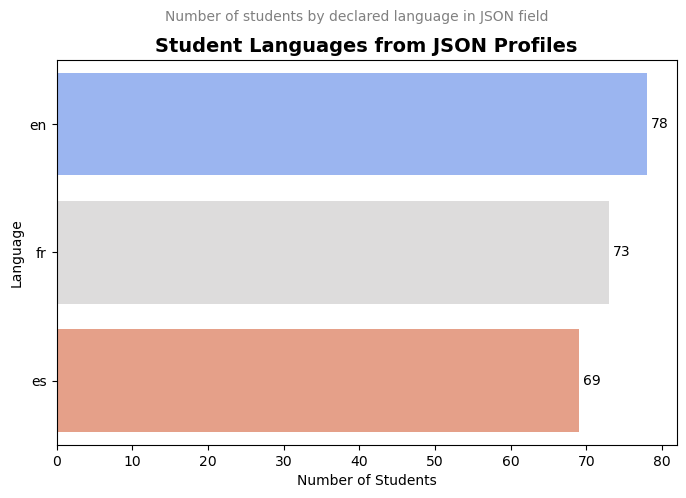

In [6]:
query4 = """
SELECT JSON_UNQUOTE(JSON_EXTRACT(s.profile_json, '$.language')) AS language,
       COUNT(*) AS total_students
FROM Students s
GROUP BY language
ORDER BY total_students DESC;
"""
df4 = pd.read_sql(query4, conn)
display(df4)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=df4,
    x="total_students",
    y="language",
    hue="language",
    palette="coolwarm",
    legend=False
)

for i, v in enumerate(df4["total_students"]):
    ax.text(v + 0.5, i, str(v), color="black", va="center")

plt.title("Student Languages from JSON Profiles", fontsize=14, fontweight="bold")
plt.suptitle("Number of students by declared language in JSON field", fontsize=10, color="gray")
plt.xlabel("Number of Students")
plt.ylabel("Language")
plt.show()


## <span style="color:#F39C12">5. Measures of Central Tendency
We calculate the **mean, median, and mode** of student scores.  
These measures summarize the general academic performance of students.

In [7]:
query_stats = "SELECT score FROM Grades;"
df_stats = pd.read_sql(query_stats, conn)

scores = df_stats["score"]
mean_score = scores.mean()
median_score = scores.median()
mode_score = scores.mode()[0]

# Create a DataFrame with the results
df_measures = pd.DataFrame({
    "Measure": ["Mean", "Median", "Mode"],
    "Value": [mean_score, median_score, mode_score]
})

print("📐 Measures of Central Tendency for Student Scores")
display(df_measures)


📐 Measures of Central Tendency for Student Scores


,Measure,Value
0,Mean,76.553931
1,Median,75.840000
2,Mode,68.280000
